## 🔹 Tahap 1: Load dan Eksplorasi Dataset

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


# Load dataset
df = pd.read_csv('dataset_buys _comp.csv')  # periksa nama file, pastikan tidak ada typo

# Tampilkan data awal
print(df.head())

# Informasi umum
print("\nInfo Dataset:")
df.info()

# Statistik deskriptif
print("\nDeskripsi Statistik:")
print(df.describe(include='all'))

# Nilai unik per kolom
print("\nNilai Unik per Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB

Deskripsi Statistik:
               Age  Income Student Credit_Rating  Buys_Computer
count         1000    1000    1000          1000    1000.000000
unique           3      

## 🔹 Tahap 2: Preprocessing Data

In [42]:
# Cek missing value
print(df.isnull().sum())

# Isi nilai NaN
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode kategorikal
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


## 🔹 Tahap 3: Persiapan Data dan Split

In [43]:
df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in ['Age', 'Income']:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df[col])

df_encoded = pd.get_dummies(df_encoded, columns=['Student', 'Credit_Rating'], drop_first=False, dtype=int)
df_encoded.drop(['Age', 'Income'], axis=1, inplace=True)
buys_computer_col = df_encoded.pop('Buys_Computer')
df_encoded['Buys_Computer'] = buys_computer_col
df_encoded.head()

,Age_encoded,Income_encoded,Student_Tidak,Student_Ya,Credit_Rating_Baik,Credit_Rating_Buruk,Buys_Computer
0,2,2,0,1,0,1,0
1,1,2,0,1,1,0,1
2,1,0,1,0,0,1,1
3,2,0,1,0,1,0,1
4,2,0,0,1,1,0,1


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Label encoding untuk fitur kategorikal
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('Buys_Computer', axis=1)
y = df_encoded['Buys_Computer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🔹 Tahap 4: Training Model dan Hyperparameter Tuning

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definisi grid parameter
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Latih model dengan GridSearch
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


## 🔹 Tahap 5: Evaluasi Model


Accuracy: 0.805

Confusion Matrix:
 [[ 57  14]
 [ 25 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



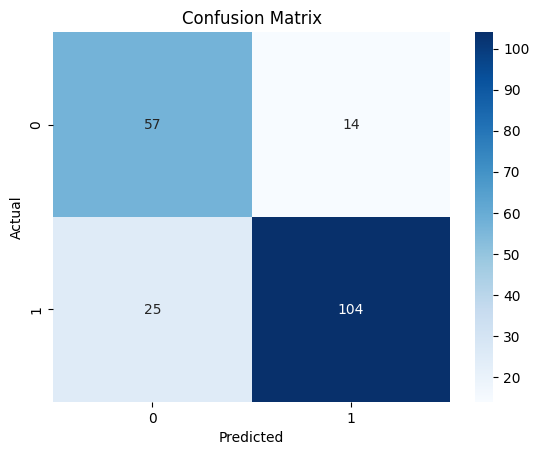

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi data uji
y_pred = best_model.predict(X_test)

# Evaluasi hasil
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualisasi confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 🔹 Tahap 6: Visualisasi Decision Tree

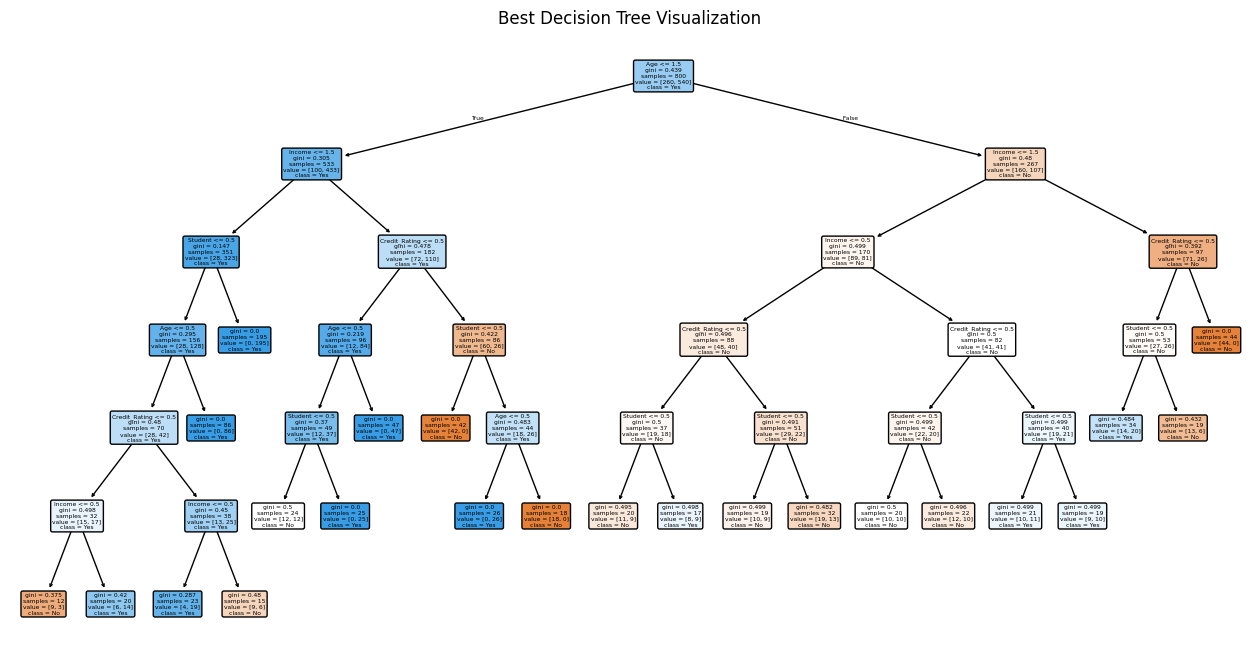

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Best Decision Tree Visualization")
plt.show()


## 🧠 Tahap 7: Hyperparameter Tuning

In [48]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


## 📈 Tahap 8: Evaluasi Lanjutan (ROC & Learning Curve)


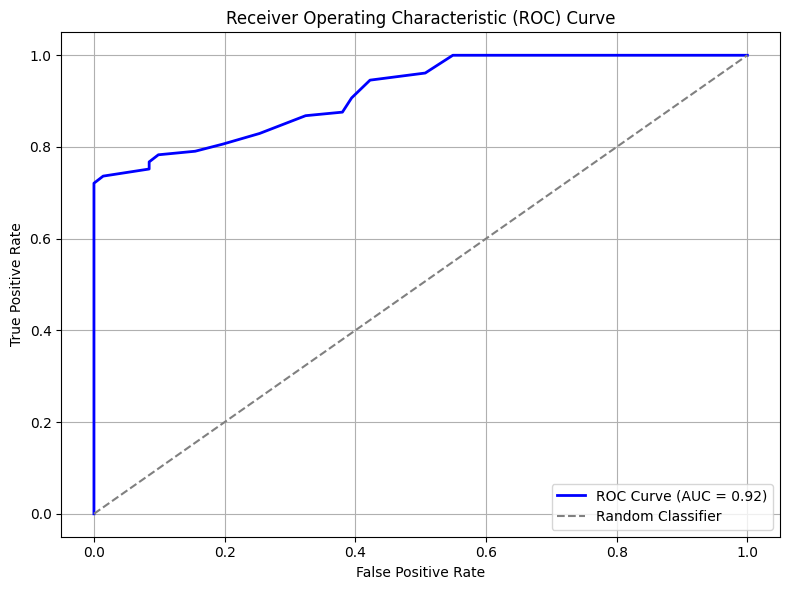

In [49]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Prediksi probabilitas kelas positif
y_prob = best_model.predict_proba(X_test)[:, 1]

# Hitung ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧮 Tahap 9: Feature Importance

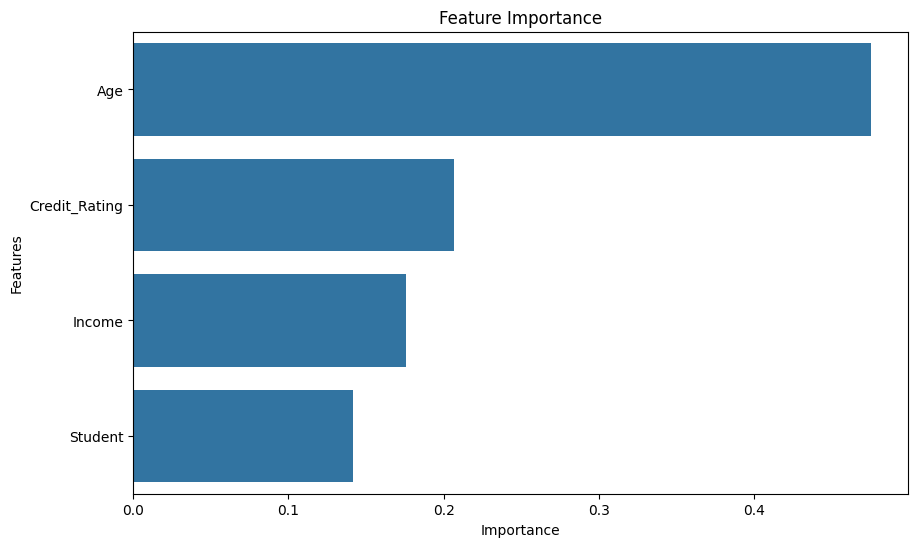

In [50]:
importances = best_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
